###Project name -- Development of functional connectivities in zebrafish spinal cord### 

###Current stage###
1. Remove and plot *possible* duplicated units in the dataset
2. Covariance analysis: clustering
3. Covariance analysis: factor analysis

###Dataset list###
* Data_Dre_E1_BTXinjHuCH2BGCaMP6f_TL_20140818_045650_corrected_signal (2014-10-01)
* (-) Data_Dre_E1_HuCH2BGCaMP6f_0_20141006_041947_corrected (2014-11-01)
* Data_Dre_E1_HuCH2BGCaMP6f_0_20141006_041947_corrected (2015-01-14)
* Data_Dre_E1_HuCGCaMP6f-__mnx1__TagRFP_0-1_20150410_032910.corrected (2015-07-20)

### What is this repository for? ###
* This repository is for data analysis code, figures, and manuscript of **Yinan**'s dataset.
* version: 1.0

### Structure of directories ###
* .gitignore  -- file to be ignored in git update
* TempDat [ignored] -- a temporary storage place for data without duplicated units.
* Plots [ignored] -- figures
* Text -- manuscripts, slides etc.
* Codes -- analysis codes
* Codes/Func -- shared functions across analysis
* Codes/Data_Analysis  -- each file stands for a code for a specific goal of analysis
* Codes/Old_code -- older version of codes, which are depreciated
* Codes/SD_code -- codes previously contributed from Shaul Druckmann
* Data -- directories of datasets
* Slides -- slides from ZW
* YinanSlides -- slides from Yinan

### Contribution/comments guidelines ###
* Text                             -- Leave the comments in *Latex* file beginning with initials like ZW, YW, SD, PK
* Code                           -- Keep a comment in the commit in detail before pushing to git

### Instantaneous neural correlation exhibits complex sequence of changes during embryonic development

* Analysis Method: Re-index neurons based on __local__/__late__ hierarchical clustering of correlation matrix
* Related files:
    * Data_Analysis_List0_1
    * __Data_Analysis_List1_1__

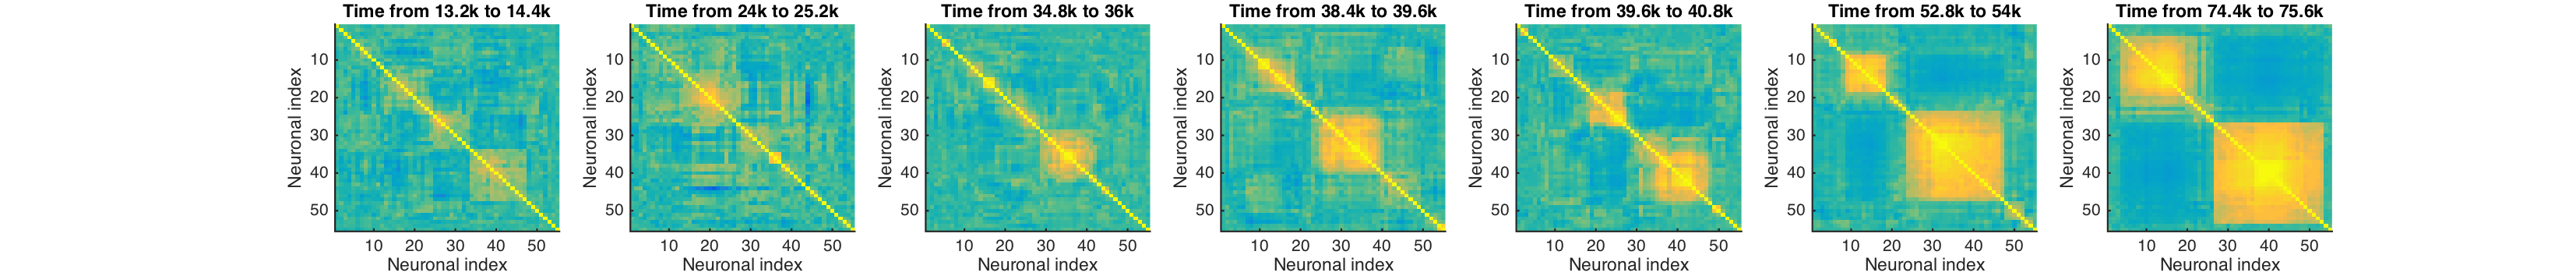

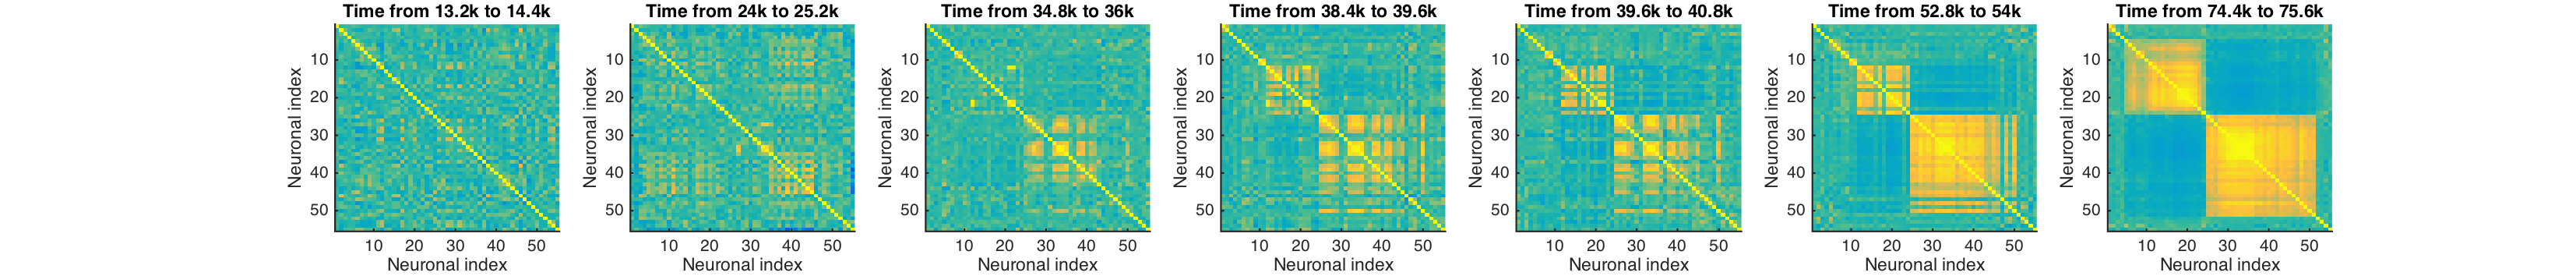

In [1]:
nFile = 1;
nTimes = [12, 21, 30, 33, 34, 45, 63];
Data_Analysis_List1_1n(nFile, nTimes);

###Neuronal activity can be predicted linearly by those of the other neurons in the network (I)
* Analysis Method -- colinearity check of correlation matrix
    1. Bartlett's test of Sphericity: whether the correlation matrix is identity matrix (or variables are uncorrelated).
    2. KMO test: whether sample number is enough in the 0.90 as marvelous, in the 0.80's as meritorious, in the 0.70's as middling, in the 0.60's as mediocre, in the 0.50's as miserable, and below 0.50 as unacceptable
    3. Computing degree of colinearity: log(|Corr(X)|)
* Results
    1. Bartlett's test of Sphericity: all subsessions are factorable.
    2. KMO test: data are enough for factor analysis (>0.70)
    3. degree of colinearity increases as a function of time
* Related files:
    * Data_Analysis_List1_2.m

###Neuronal activity can be predicted linearly by those of the other neurons in the network (II)
* Analysis Method -- Factor analysis model
    1. Fit neuronal activity model using __factor analysis__ and __Leave-One-Neuron-Out__ estimation 
    2. Find the best fit from LONO using amount of Explained-Variance
    
        $EV = 1 - \frac{\sum(dff_i - <dff_i|dff_{-i}, L, \Psi>)^2}{var(dff)}$    
* Results
    1. Neuron shows good fit (high EV) as involved in a community, but low EV as not.
    2. Total EV across neurons increases as a function against time and is saturated with a higher dimension
    3. Comparing the EV using current time point vs the other time point, the plots generally imply the similarity of factors against time
* Related files:
    * Data_Analysis_List2
    * Data_Analysis_List2_1
    * Data_Analysis_List2_2
    * Data_Analysis_List2_3
    * __Data_Analysis_List2_0__

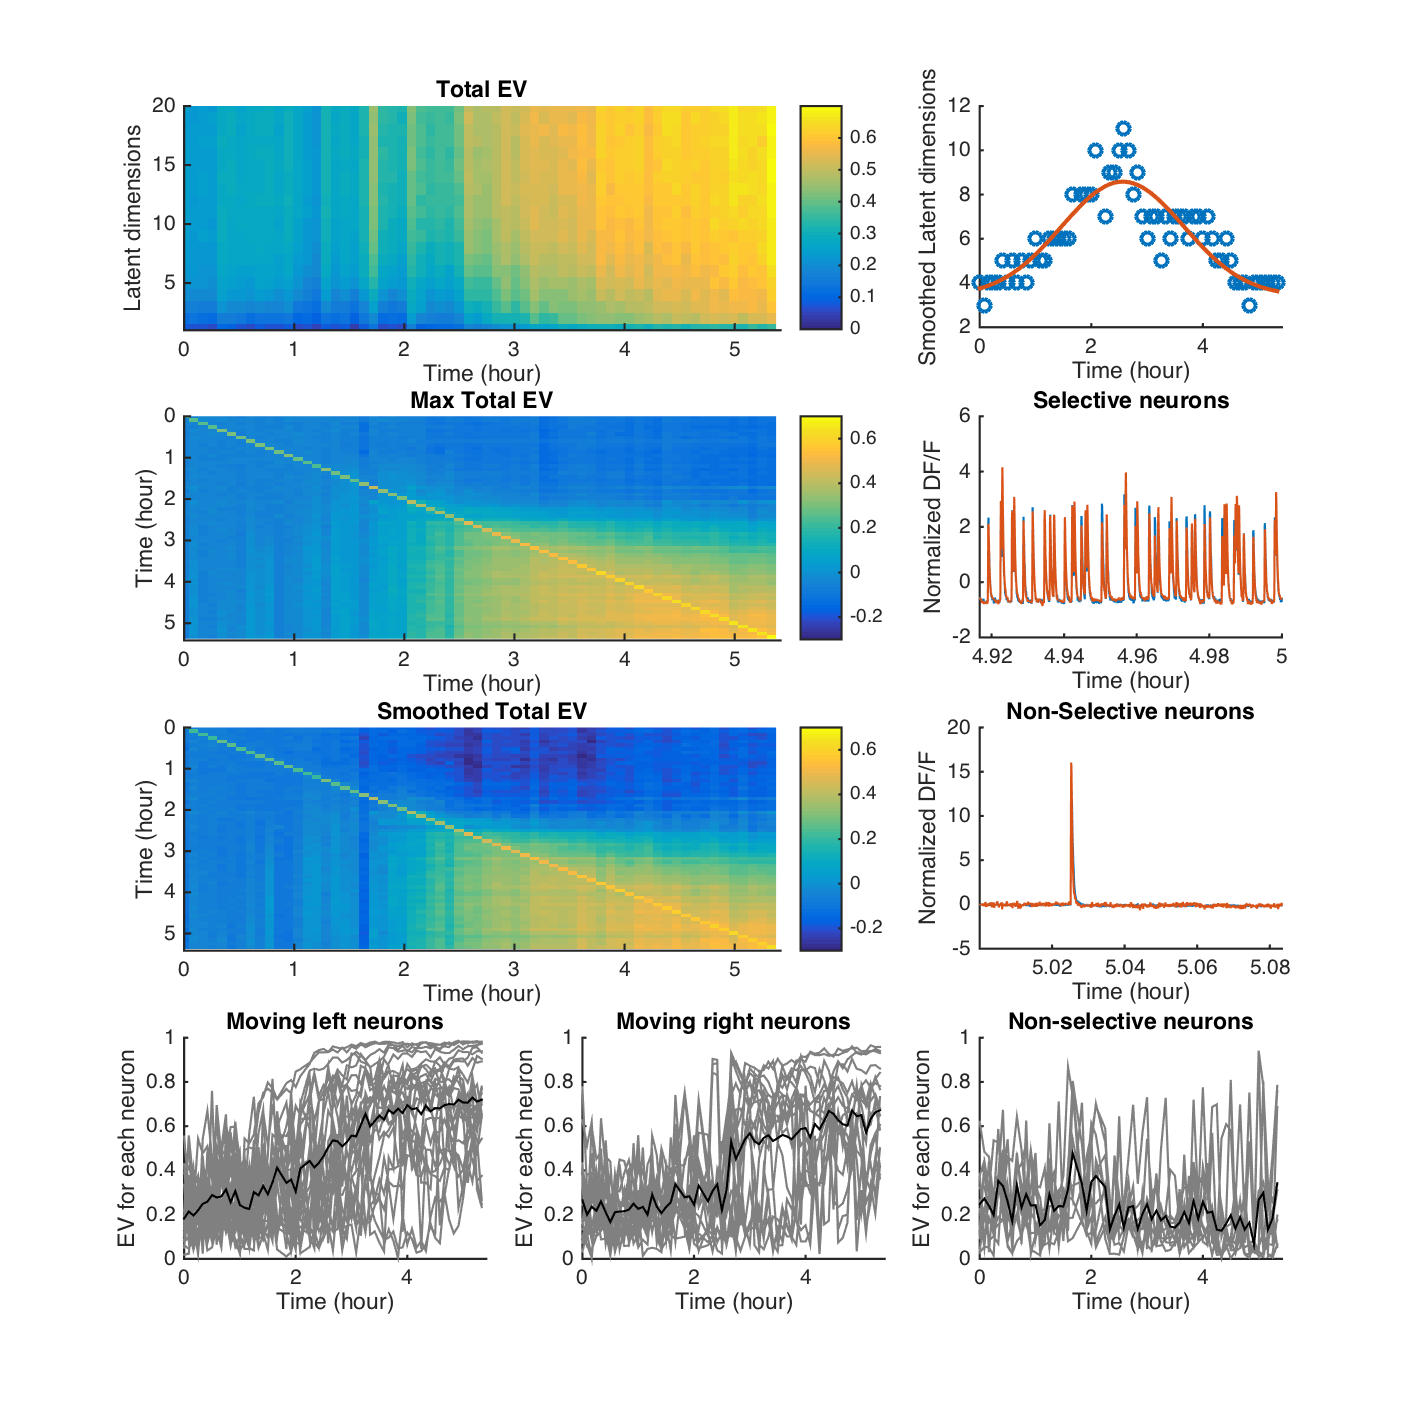

In [2]:
nFile = 1;
Data_Analysis_List2_0n(nFile);

###Number of functional community is tested through mulitple methods using FA
* Test Method
    1. Eigenvalue based methods
        * Kaiser-Guttman: eigenvalue > 1.0
        * Variance: total amount of variance > 95% (or 99%)
        * Parallel analysis: signaficance of eigenvalues through Monte-Carlo resampling
        * Velicer's MAP: Velicer, W. F., Eaton, C. A., and Fava, J. L. (2000)
    2. Likelihood based methods:
        * Chi square test using likelihood ratio $LR = -\log(|L|/|L_0|)$
        * AIC $= -2L + 2*df$ (df: number of paramters) 
        * BIC $= -2L + \log N*df$ (N: number of samples)
        * CAIC $= -2L + (\log N + 1)*df$
    3. Estimation error based methods:
        * Signficance of residuals (SRMR)
        * Root mean square error of approximation (RMSEA)
        * Goodness of fit index (GFI or AGFI-- adjusted version)
        * Comparative fit index (CFI)
* Results
    1. __Number of functional community increses then decreases as a function of time, which is proved through multiple tests using FA__
    2. Especially, this tendency is consistent using KG, PA, CAIC, SRMR and CFI tests, which are more reliable than the rest.
    3. The methods based on eigenvalue and likelihood intend to show an overfit of the parameter.
    4. SRMR shows a lower number of communities than LONO, which possibly stems from oversimplification of noise structure in residual signals (we will further analyze it in the next section).
* Related files:
    * __General test (see below)__
    * Data_Analysis_List2_0_4
    * __Data_Analysis_List2_0_3__
* References
    * Velicer, W. F. (1976). Determining the number of components from the matrix of partial correlations. Psychometrika, 41, 321-327.
    * Velicer, W. F., Eaton, C. A., and Fava, J. L. (2000). Construct explication through factor or component analysis: A review and evaluation of alternative procedures for determining the number of factors or components. Pp. 41-71 in R. D. Goffin and E. Helmes, eds., Problems and solutions in human assessment. Boston: Kluwer.
    * O'Connor, B. P. (2000). SPSS and SAS programs for determining the number of components using parallel analysis and Velicer's MAP test. Behavior Research Methods, Instrumentation, and Computers, 32, 396-402.
    * Buja, A., & Eyuboglu, N., 1992, Remarks on parallel analysis. Multivariate Behavioral Research, 27, 509-540

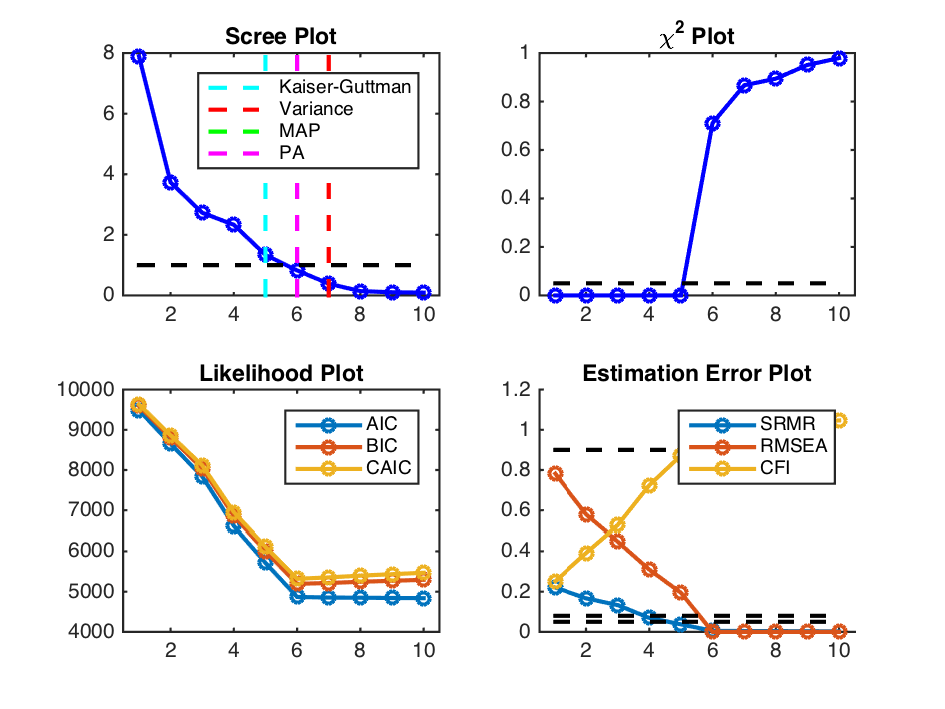

Based on eigenvalue analysis
# of factors using Kaiser-Guttman criterion: 5
# of factors using total variance (95%): 7
# of factors using parallel analysis: 6
# of factors using Velicer MAP (4th order): 6
Based on likelihood analysis
# of factors using chi square test: 6
# of factors using AIC: 10
# of factors using BIC: 6
# of factors using CAIC: 6
Based on estimation error analysis
# of factors using signficance of residuals: 5
# of factors using root mean square error of approximation: 6
# of factors using comparative fit index: 6

In [3]:
addpath('../Func');
maxM                    = 20;
numFactor               = 6;
numTrials               = 100;
realLoadingMat          = tril(randn(maxM, numFactor));
commonFactors           = randn(numTrials, numFactor);
noise                   = randn(numTrials, maxM) * 0.6;

X                       = commonFactors * realLoadingMat' + noise;


isScreePlot             = true;
numFactors              = numFactorsWithNoCrossValidation(X, 10, isScreePlot);

disp('Based on eigenvalue analysis')
disp(['# of factors using Kaiser-Guttman criterion: ', num2str(numFactors.kgM)]);
disp(['# of factors using total variance (95%): ', num2str(numFactors.varM)]);
disp(['# of factors using parallel analysis: ', num2str(numFactors.paM)]);
disp(['# of factors using Velicer MAP (4th order): ', num2str(numFactors.vMapM)]);

disp('Based on likelihood analysis')
disp(['# of factors using chi square test: ', num2str(numFactors.pChisqTestM)]);
disp(['# of factors using AIC: ', num2str(numFactors.AICM)]);
disp(['# of factors using BIC: ', num2str(numFactors.BICM)]);
disp(['# of factors using CAIC: ', num2str(numFactors.CAICM)]);

disp('Based on estimation error analysis')
disp(['# of factors using signficance of residuals: ', num2str(numFactors.SRMRM)]);
disp(['# of factors using root mean square error of approximation: ', num2str(numFactors.RMSEAM)]);
disp(['# of factors using comparative fit index: ', num2str(numFactors.CFIM)]);

setFigureSize(2*8, 2*6);

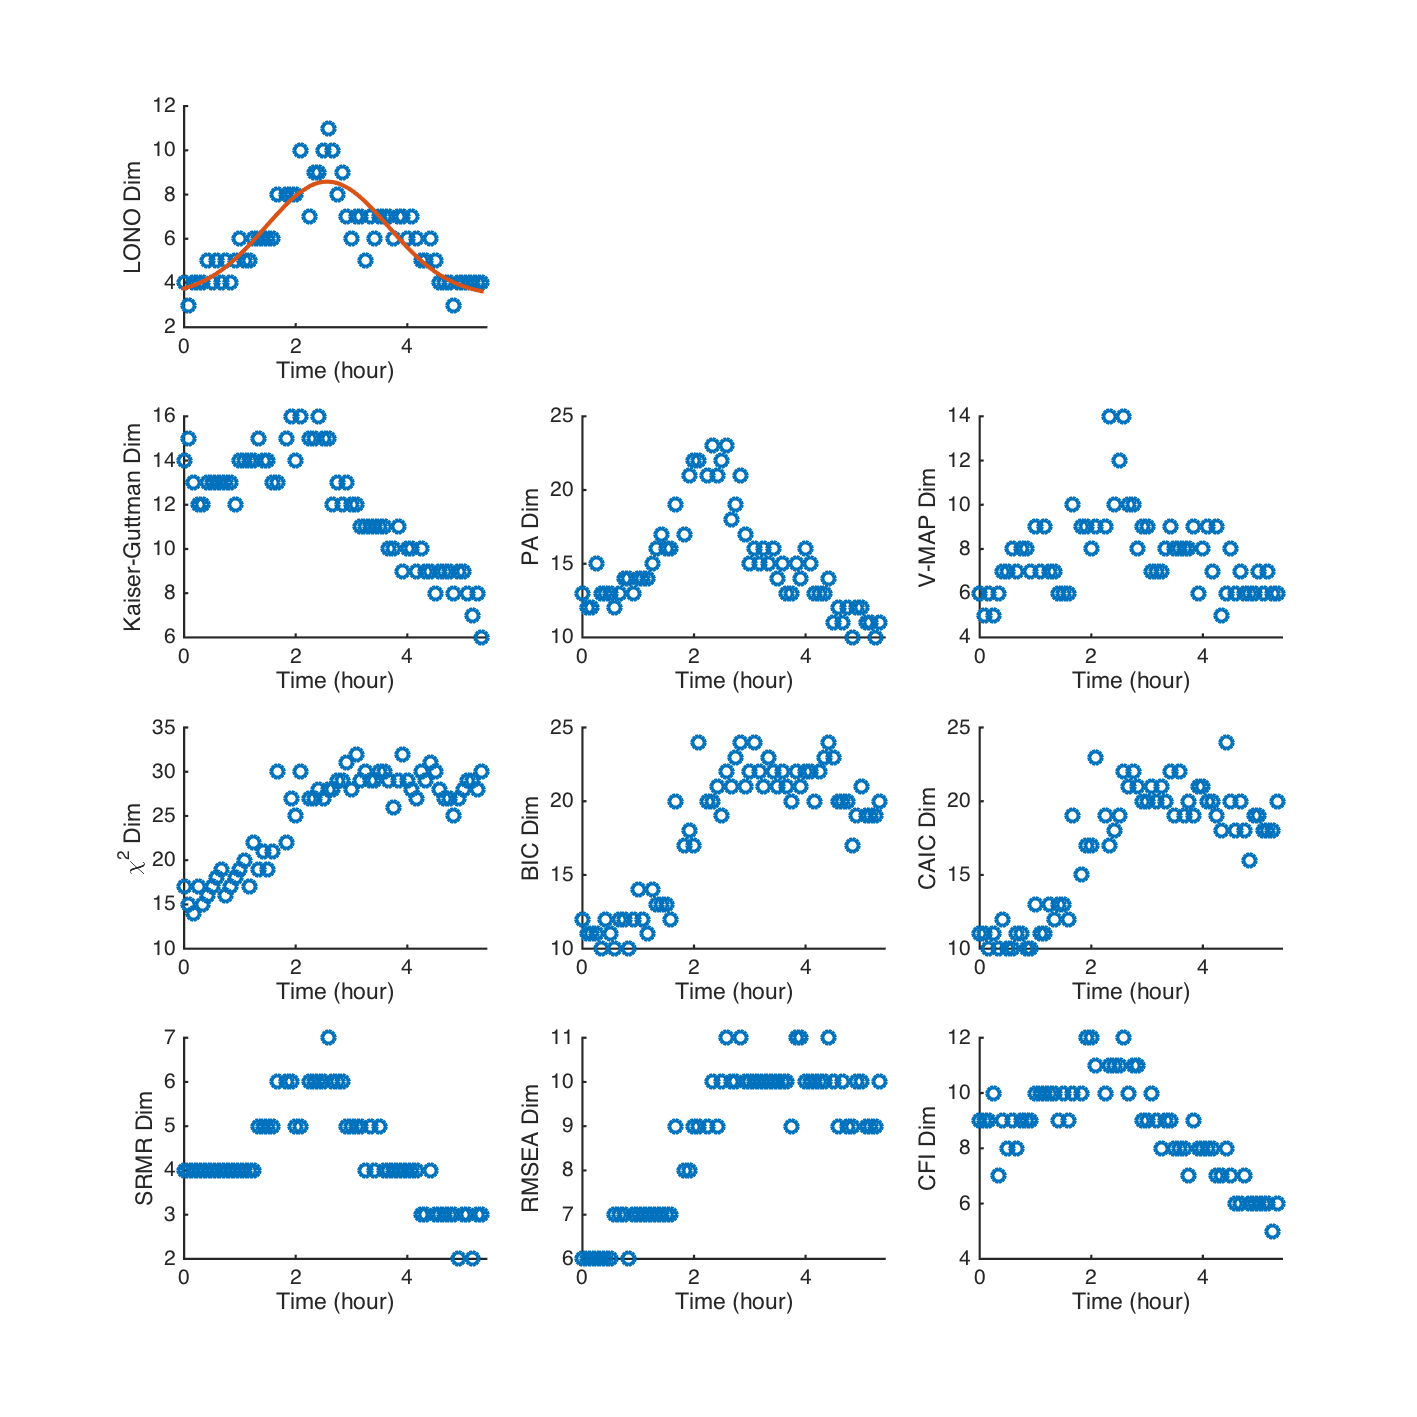

In [4]:
nFile = 1;
Data_Analysis_List2_0_3n(nFile);

###Residual matrix after FA decomposition
* Residual model -- Factor analysis model
    1. $\Sigma = LHL' + \Psi + \Sigma_{res}$, where $\Sigma$ is correlation matrix from data, $L$ is the factor loading matrix from FA, $H$ is the correlation matrix from factors (identity matrix with orthogonal rotation), $\Psi$ is the uncorrelated noise from FA
    2. $L$ matrix is ordered according to the amount of EV for each factor (PCA rotation)
* Results
    1. Improved SNR against time: uncorrelated channel noise ($\Psi$) decreases as a function of time
    2. EV of factors (ordered by PCA) shows a dramatic decrease against its index in late stage, but very slight decrease in early stage
    3. Residual matrix (?)
* Related files:
    * Data_Analysis_List2_7_0
    * __Data_Analysis_List2_7_1__
    * __Data_Analysis_List2_7_3__
    * __Data_Analysis_List2_7_4__

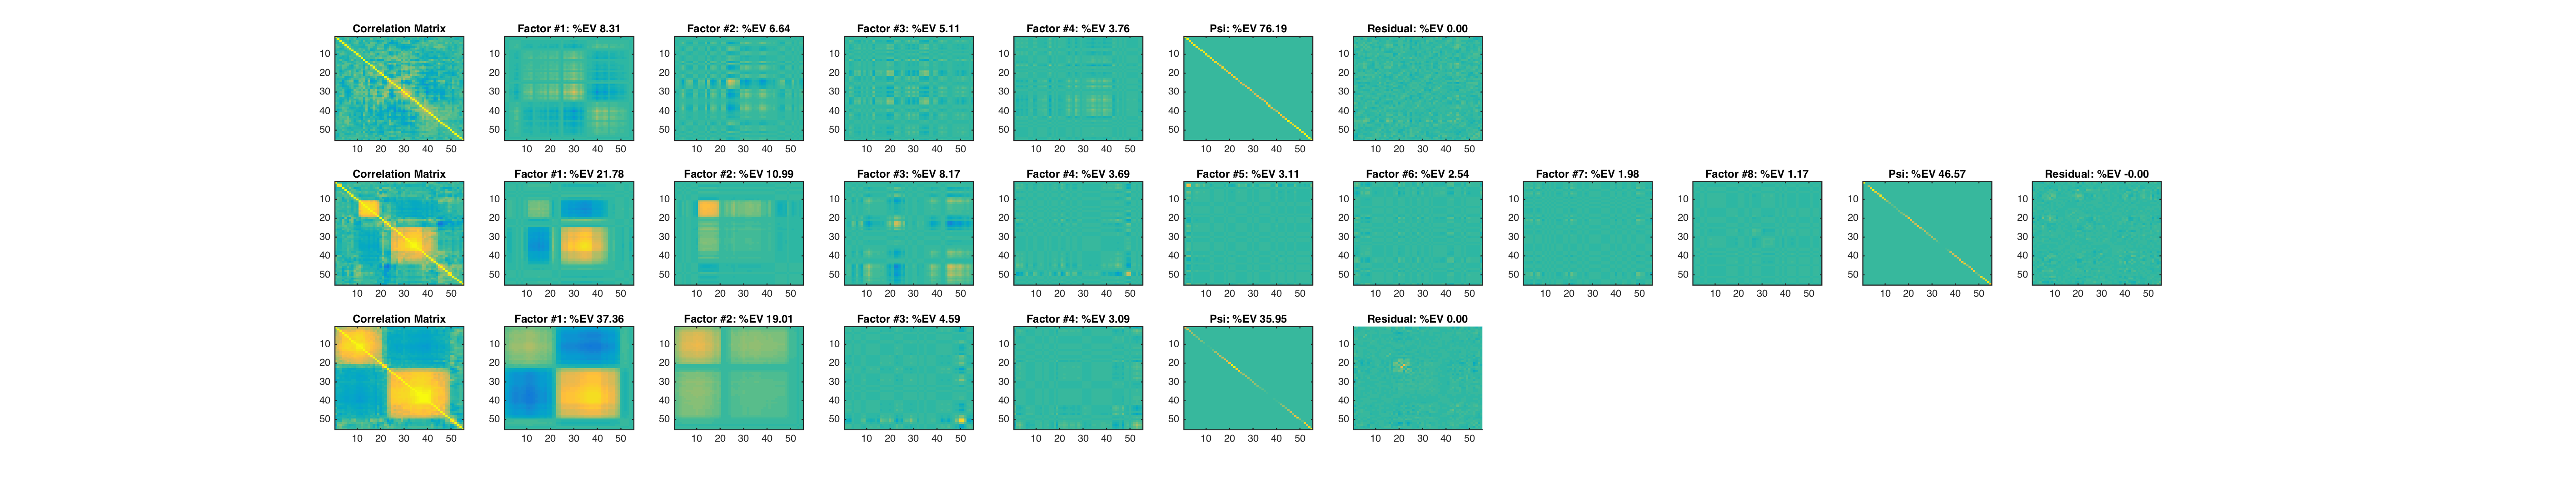

In [5]:
nFile = 1;
nTime = [3, 35, 63];
Data_Analysis_List2_7_1n(nFile, nTime);

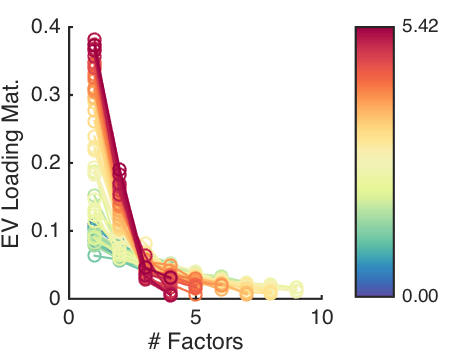

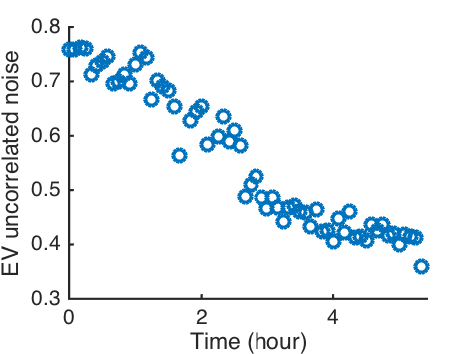

In [1]:
nFile = 1;
Data_Analysis_List2_7_3n(nFile);
Data_Analysis_List2_7_4n(nFile);

###Rotation of loading matrix L
* Rotation Method
    1. Orthomax -- H is an identity matrix
        * PCA
        * Varimax
        * Quartimax
        * Equamax
        * Parsimax
    2. Oblique -- H is not always an identity matrix
        * Promax
        * Nonnegative Matrix Factorization (NNMF)
* Results
    1. Oblique rotation gives a more community-like structure, where there is an interaction among the communities.
    2. In general, based on orthomax solution, Varimax rotation is good enough to capture the communities structure (comparing to PCA), but needs refining using further oblique rotation
    3. Question: how to find a rotation, which makes the change of communities seamlessly in time?
* Related files:
    * __Data_Analysis_List2_7_2__

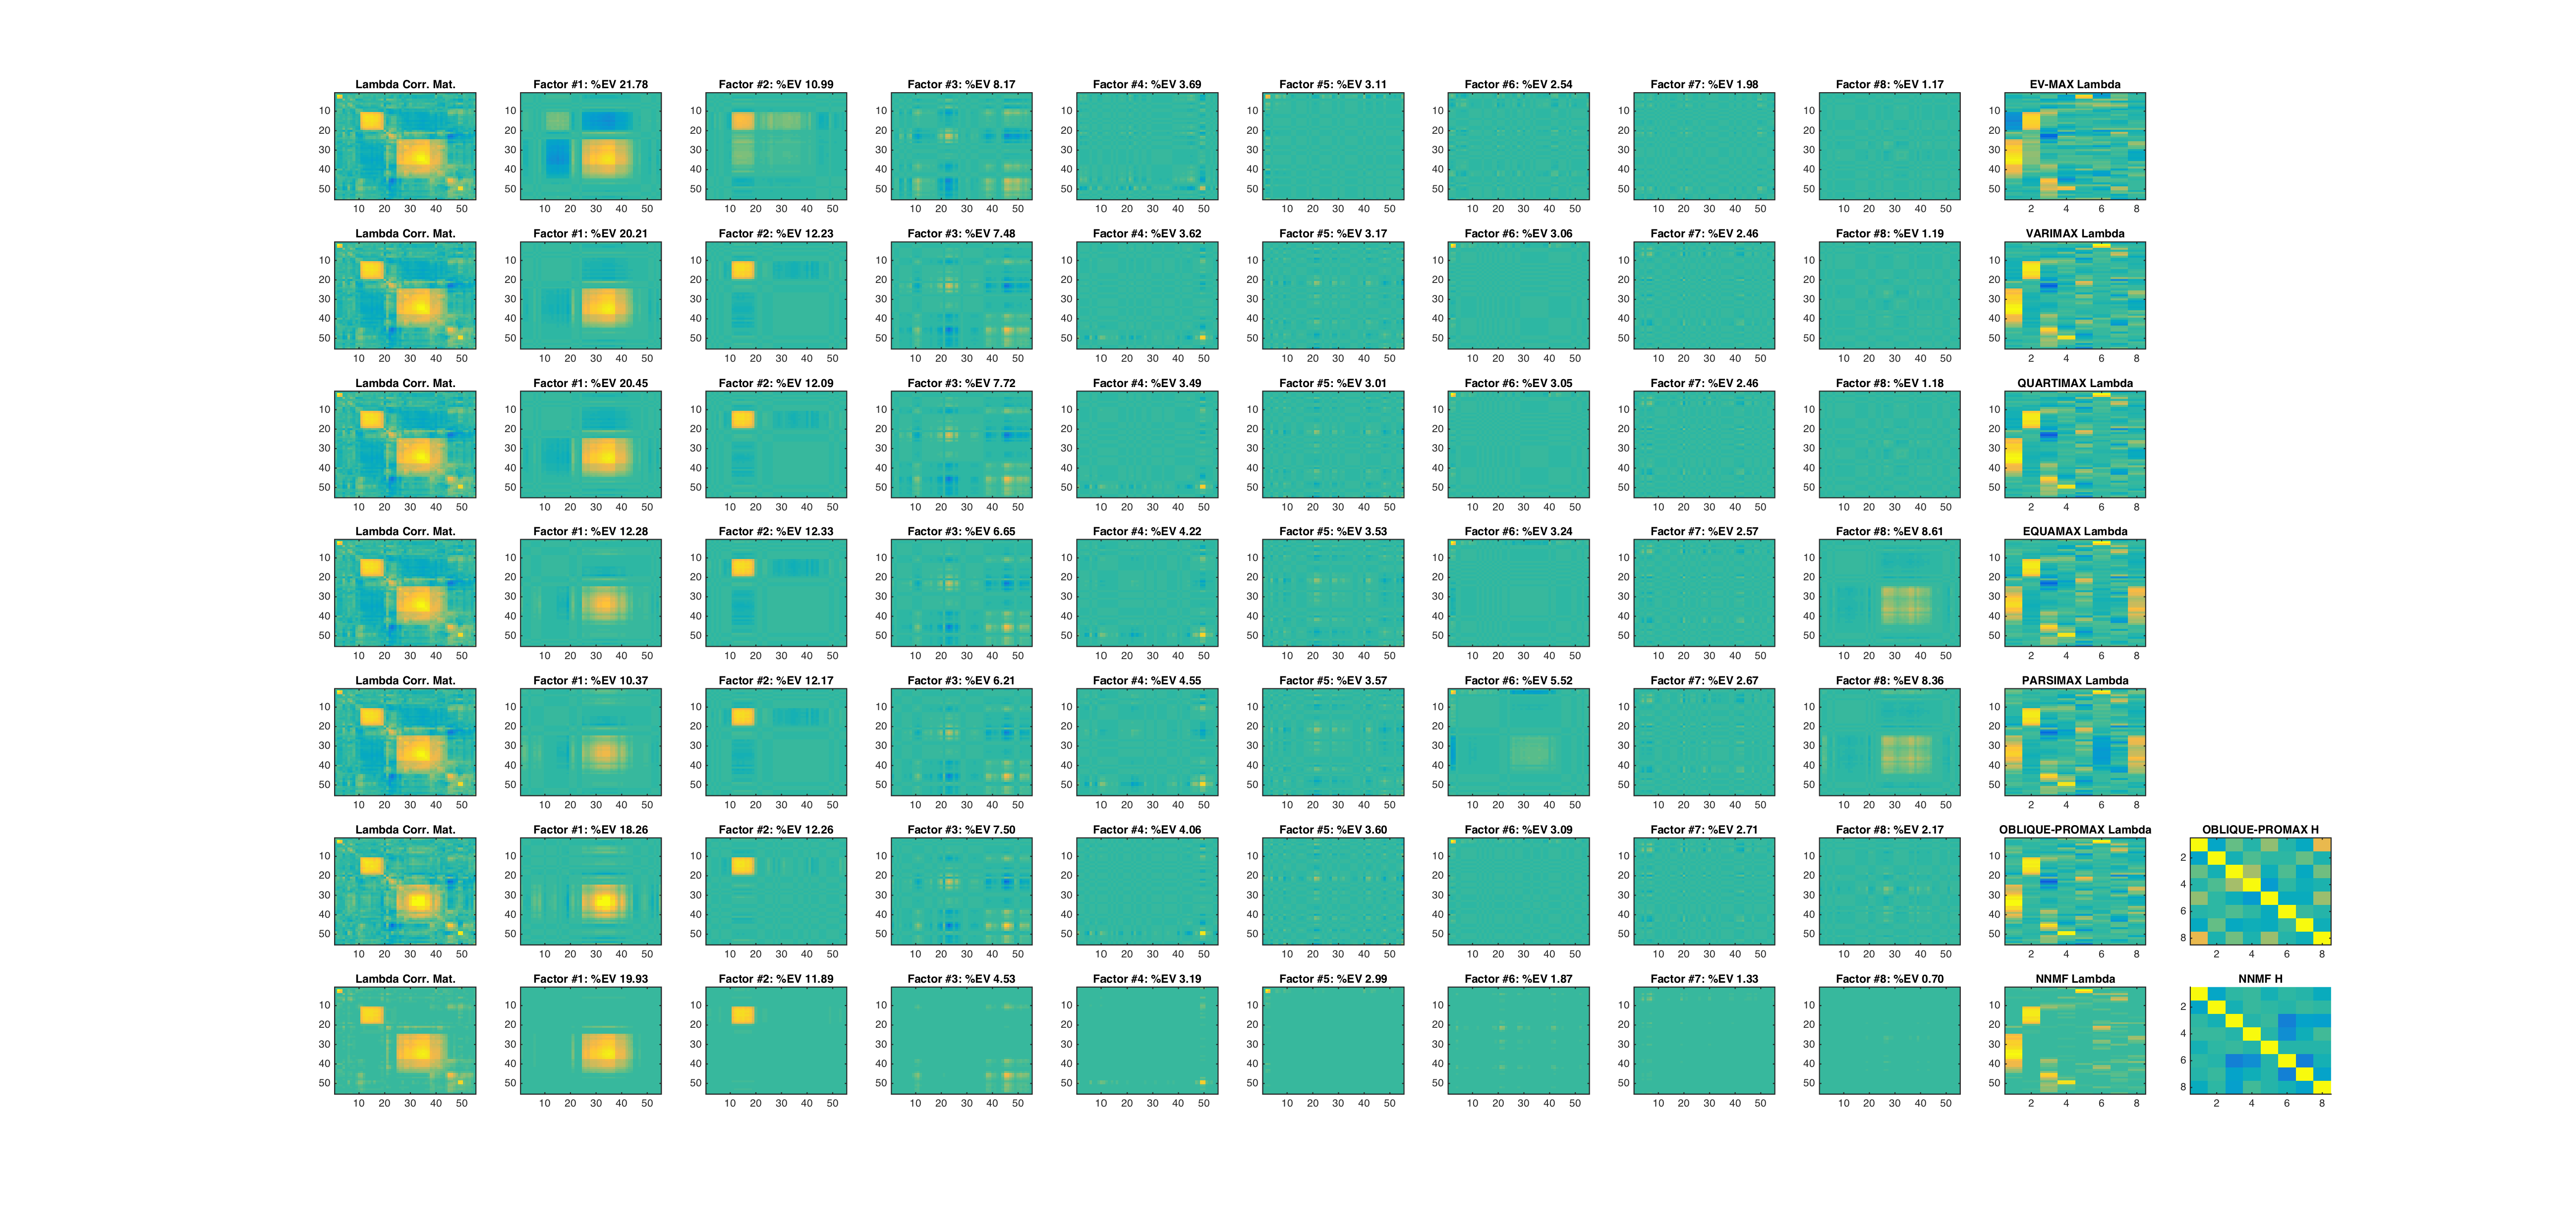

In [1]:
nFile = 1;
nTime = 35;
Data_Analysis_List2_7_2n(nFile, nTime);